# Pendulo Simple

Importar las librerias necesarias, ellas son NumPy, SymPy y MatPlotLib

In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

Definicion de variables, constantes y ecuación diferencial que describe el movimiento del pendulo

In [2]:
g = 9.81
l = 1
theta_0 = np.deg2rad(35)
theta_dot_0 = 0

In [3]:
t = smp.symbols('t')
theta = smp.Function('theta')(t)

dth_dt = smp.diff(theta, t, 1)
ddth_ddt = smp.diff(theta, t, 2)

lhs = l*ddth_ddt + g*smp.sin(theta)
rhs = 0

eq = smp.Eq(lhs, rhs)                                       # Define DE

sym_sol = smp.solve(eq, ddth_ddt)[0]                        # Rearrange the DE

num_solution = smp.lambdify((t, theta), sym_sol)            # Convert to numeric the arranged DE

sym_sol

-9.81*sin(theta(t))

#### Definicion intervalo de integracion

In [4]:
a, b = 0, 5
t = np.linspace(a, b, 151)

#### Resolucion de forma numerica de la DE utilizando `solve_ivp`

In [5]:
def sys_of_ode(t, S):
    theta, dth_dt = S

    ddth_ddt = num_solution(t, theta)

    return dth_dt, ddth_ddt

init_cond = [theta_0, theta_dot_0]

solution = solve_ivp(
        fun = sys_of_ode,
        t_span = (a, b),
        y0 = init_cond,
        t_eval = t,
        rtol=1e-8
)

t_sol = solution.t
theta_sol = solution.y[0]
dth_dt_sol = solution.y[1]

theta_sol_deg = np.rad2deg(solution.y[0])
dth_dt_sol_deg = np.rad2deg(solution.y[1])

### Diagrama temporal 
Se representa el movimiento del pendulo en el dominio temporal, se grafica tanto $\theta$ como $\dot \theta$ en funcion del tiempo

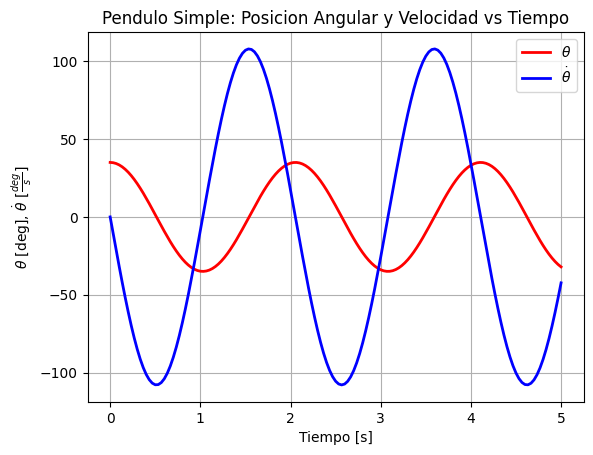

In [6]:
plt.plot(t_sol, theta_sol_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t_sol, dth_dt_sol_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Pendulo Simple: Posicion Angular y Velocidad vs Tiempo')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [deg], $\dot \theta$ [$\frac{deg}{s}$]')
plt.grid()

Animacion del grafico anterior, $\theta$ & $\dot \theta$ vs t

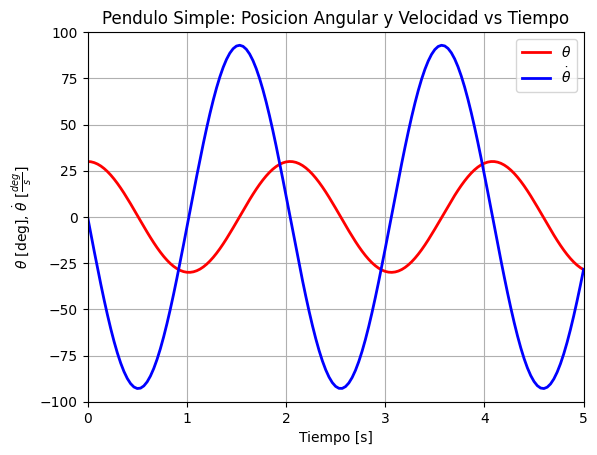

In [13]:
fig, axis = plt.subplots()

theta_anim, = axis.plot(t_sol[0], theta_sol_deg[0], 'r', lw=2, label=r'$\theta$')
theta_dot_anim, = axis.plot(t_sol[0], dth_dt_sol_deg[0], 'b', lw=2, label=r'$\dot \theta$')
axis.set_xlim(a, b)
axis.set_ylim([-100, 100])
plt.title('Pendulo Simple: Posicion Angular y Velocidad vs Tiempo')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [deg], $\dot \theta$ [$\frac{deg}{s}$]')
plt.grid()

def update_anim(i):
    
    theta_anim.set_data(t_sol[:i+1], theta_sol_deg[:i+1])
    theta_dot_anim.set_data(t_sol[:i+1], dth_dt_sol_deg[:i+1])

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                frames = len(t_sol)
)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ProgramData\\chocolatey\\lib\\ffmpeg\\tools\\ffmpeg\\bin\\ffmpeg.exe'
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save('dominio_temporal.mp4', writer=ffmpeg_writer)

plt.show()

### Diagrama de fase 
Se representa el movimiento del pendulo en el plano de fase, el eje x toma la variable de estado $\theta$ y el eje y sera $\dot \theta$

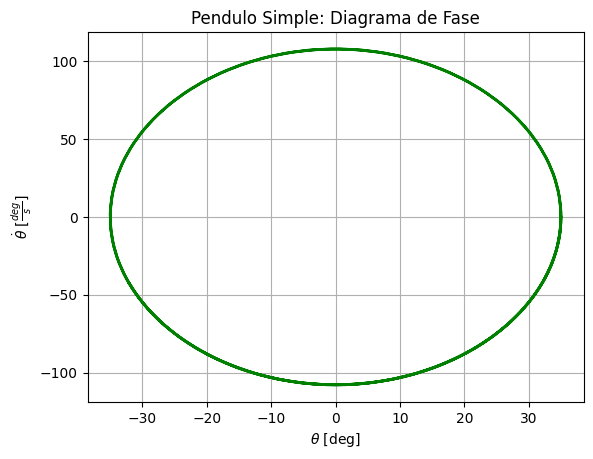

In [7]:
plt.plot(theta_sol_deg, dth_dt_sol_deg, 'g', lw=2)
plt.title('Pendulo Simple: Diagrama de Fase')
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\dot \theta$ [$\frac{deg}{s}$]')
plt.grid()

Animación del grafico anterior, diagrama de fase

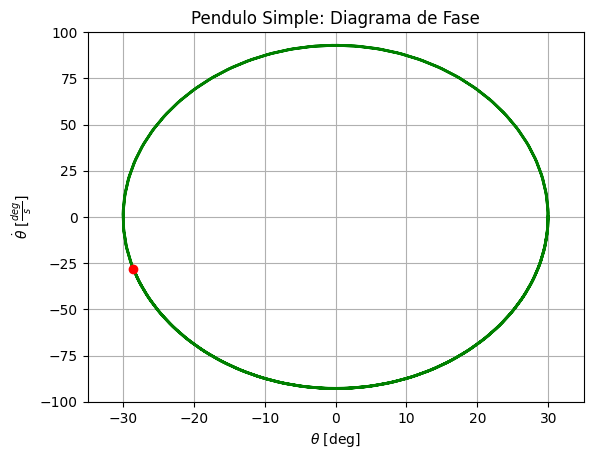

In [35]:
fig, axis = plt.subplots()

phase_curve, = axis.plot(theta_sol_deg[0], dth_dt_sol_deg[0], 'g', lw=2)
phase_dot, = axis.plot(theta_sol_deg[0], dth_dt_sol_deg[0], 'ro')
axis.set_xlim(-35, 35)
axis.set_ylim([-100, 100])
plt.title('Pendulo Simple: Diagrama de Fase')
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\dot \theta$ [$\frac{deg}{s}$]')
plt.grid()

def update_anim(i):
    phase_curve.set_data(theta_sol_deg[:i+1], dth_dt_sol_deg[:i+1])
    phase_dot.set_data((theta_sol_deg[i],),(dth_dt_sol_deg[i],))

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                frames = len(t_sol)
)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ProgramData\\chocolatey\\lib\\ffmpeg\\tools\\ffmpeg\\bin\\ffmpeg.exe'
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save('diagrama_fase.mp4', writer=ffmpeg_writer)

plt.show()

### Animación del pendulo simple


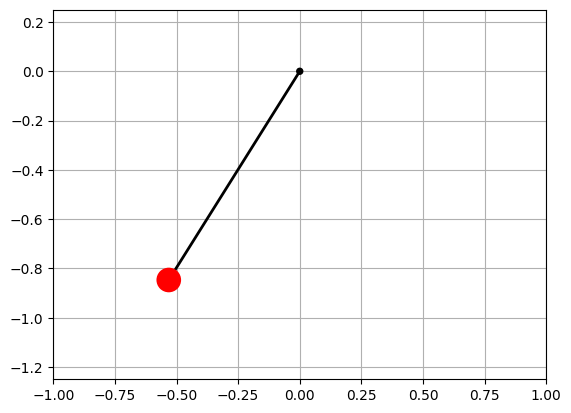

In [37]:
# Takes theta as input and gives the position of the pendulum

def pend_pos(theta):
    return l*np.sin(theta), -l*np.cos(theta)

# Create the figure of the animation, the line for the pendulum and the circle for the mass

fig = plt.figure()
axis = fig.add_subplot(aspect='equal')
axis.set_xlim(-1, 1)
axis.set_ylim(-1.25, 0.25)
axis.grid()

x0, y0 = pend_pos(theta_0)
line, = axis.plot([0, x0], [0, y0], lw=2, c='k')
hinge_circle = axis.add_patch(plt.Circle((0, 0), 0.015, fc='k', zorder=3))
circle = axis.add_patch(plt.Circle((x0, y0), 0.05, fc='r', zorder=3))

# Define function to update data each frame (animate plot)

def update_anim(i):
    x, y = pend_pos(theta_sol[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                frames = len(t_sol)
)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ProgramData\\chocolatey\\lib\\ffmpeg\\tools\\ffmpeg\\bin\\ffmpeg.exe'
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save('pendulo_animado.mp4', writer=ffmpeg_writer)

plt.show()


### Animación final
Figura con las tres animaciones en simultaneo

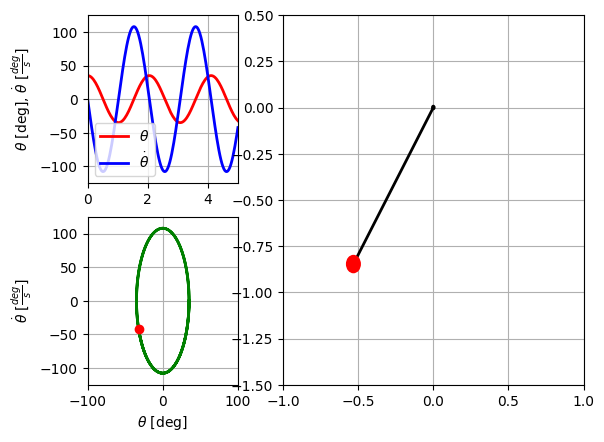

In [8]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[1, 1])

# Figure for the time domain animation

axis_0 = fig.add_subplot(gs[0, 0])
theta_anim, = axis_0.plot(t_sol[0], theta_sol_deg[0], 'r', lw=2, label=r'$\theta$')
theta_dot_anim, = axis_0.plot(t_sol[0], dth_dt_sol_deg[0], 'b', lw=2, label=r'$\dot \theta$')
axis_0.set_xlim(a, b)
axis_0.set_ylim([-125, 125])
axis_0.legend()
axis_0.set_ylabel(r'$\theta$ [deg], $\dot \theta$ [$\frac{deg}{s}$]')
axis_0.grid()

# Figure for the phase domain animation

axis_1 = fig.add_subplot(gs[1, 0])
phase_curve, = axis_1.plot(theta_sol_deg[0], dth_dt_sol_deg[0], 'g', lw=2)
phase_dot, = axis_1.plot(theta_sol_deg[0], dth_dt_sol_deg[0], 'ro')
axis_1.set_xlim(-100, 100)
axis_1.set_ylim([-125, 125])
axis_1.set_xlabel(r'$\theta$ [deg]')
axis_1.set_ylabel(r'$\dot \theta$ [$\frac{deg}{s}$]')
axis_1.grid()

# Figure for the pendulum animation

def pend_pos(theta):
    return l*np.sin(theta), -l*np.cos(theta)

axis_2 = fig.add_subplot(gs[:, 1])
axis_2.set_xlim(-1, 1)
axis_2.set_ylim(-1.5, 0.5)
axis_2.grid()

x0, y0 = pend_pos(theta_0)
line, = axis_2.plot([0, x0], [0, y0], lw=2, c='k')
hinge_circle = axis_2.add_patch(plt.Circle((0, 0), 0.015, fc='k', zorder=3))
circle = axis_2.add_patch(plt.Circle((x0, y0), 0.05, fc='r', zorder=3))

# Animation

def update_anim(i):

    theta_anim.set_data(t_sol[:i+1], theta_sol_deg[:i+1])
    theta_dot_anim.set_data(t_sol[:i+1], dth_dt_sol_deg[:i+1])

    phase_curve.set_data(theta_sol_deg[:i+1], dth_dt_sol_deg[:i+1])
    phase_dot.set_data((theta_sol_deg[i],),(dth_dt_sol_deg[i],))

    x, y = pend_pos(theta_sol[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                frames = len(t_sol)
)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ProgramData\\chocolatey\\lib\\ffmpeg\\tools\\ffmpeg\\bin\\ffmpeg.exe'
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save('anim_combined.mp4', writer=ffmpeg_writer)

plt.show()